## Inequalities

The following code plots Markov's and Chebyshev's inequalities. First import pylab, which in turn will import numpy and matplotlib.

In [1]:
%pylab inline
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


Next plot the Markov and Chebyshev bounds. 

In [2]:
def plot_markov_chebyshev(mu, sig):

    a_min = mu
    a_max = min(mu*20,sig*10)

    a = np.linspace(a_min, a_max, 10001)
    plt.plot(a, mu/a, 'b', linewidth=3.0, label='Markov $\mu/a$')

    b_min = mu+sig
    b = np.linspace(b_min, a_max, 10001)
    plt.plot(b, (sig/(b-mu))**2, 'r', linewidth=3.0, label='Chebyshev $(a-\mu)/\sigma^2$')
    plt.plot([mu,mu],[0,1.1])
    plt.plot([mu+sig,mu+sig],[0,1.1],'r')
    plt.legend(fontsize = 30)

    plt.title('Markov and Chebyshev bounds on $P(X\geq a)$ for $\mu=$%0.1f and $\sigma=$%0.1f' %(mu,sig), fontsize = 20)
    plt.grid()
  
    xticks_array = np.concatenate((np.linspace(mu, np.ceil(a_max/mu)*mu, int(np.ceil(a_max/mu))), np.array([0, mu+sig])))
    #xticks_array=[0,μ+σ]+xticks_array
    plt.xticks(xticks_array, fontsize = 16)
    plt.yticks(np.linspace(0.2, 1, 5), fontsize = 16)
    plt.xlabel('a', fontsize = 20)
    plt.ylabel('Probability bounds', fontsize = 20)
    plt.gcf().set_size_inches(16,8)
    plt.gca().set_xlim([0, a_max])
    plt.gca().set_ylim([0,1.1])
    plt.show()

Finally, interactive widgets to let you control the mean and standard deviation. Observe that 
for $a$ close to the mean, Markov's inequality is stronger, but as $a$ grows, Chebyshev's inequality decreases quadratically and becomes stronger.  

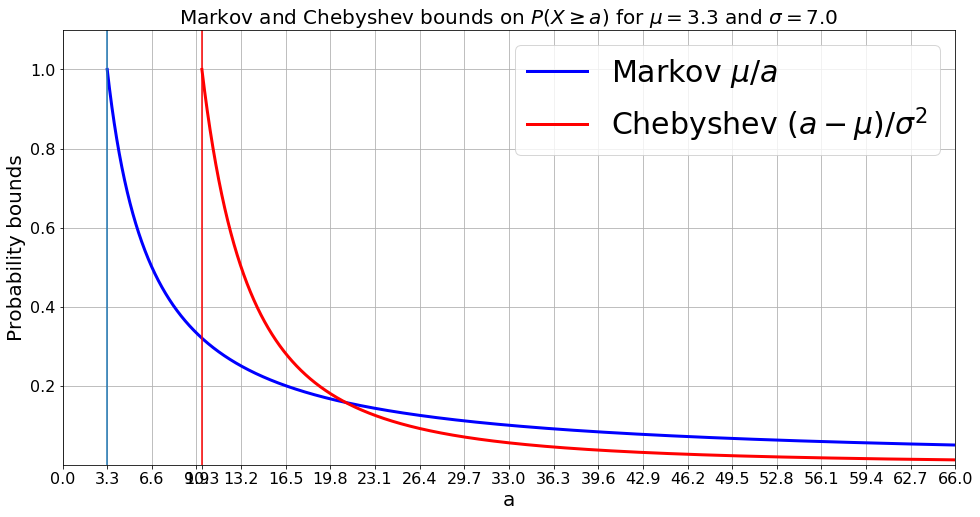

In [3]:
widgets.interact(plot_markov_chebyshev, mu=widgets.FloatSlider(description = '$\mu$', min=0.5, max=20, step=0.1, value=8, continuous_update = False), 
sig=widgets.FloatSlider(description = '$\sigma$', min=0.5, max=20, step=0.1, value=5, continuous_update = False))

## Law of Large Numbers

We demonstrate the Law of Large Numbers by plotting the distribution of sample means.

The following code calculates and plots the probability distribution  function (PDF) of the sample mean
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.$$

### Uniform distributions

The $X_i$ follow an i.i.d. uniform distribution on interval $[a,b]$
$$f_{X_i}(x)=\begin{cases}
\frac{1}{b-a} & a\le x\le b\\
0 & \text{otherwise}
\end{cases}$$

In [6]:
# Generate the sample mean of k uniform distribution on [a,b], repeat that n times
def generate_uniform_counts(a,b,k,n):
    X= random.uniform(a,b,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/k
    return S

def uniform_plot_hist(s,k,h):
    a=s[0]
    b=s[1]
    if h>0:
        n=h
        counts=generate_uniform_counts(a,b,k,n)
        hist(counts,bins=30,normed=1);
        xlim([0,10])
        plot([(a+b)/2, (a+b)/2], [0, 1], 'g--', linewidth = 2.0)
    #title('Histogram of $\overline{X}_n$ with n=%d and s=%d'%(k,n), fontsize = 20)
    #xlabel('$x_n$', fontsize = 20)
    #ylabel('$frquency$', fontsize = 20)

# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
def uniform_mean_pdf(s,n,h):
    a = s[0]
    b = s[1]
    d = 10.0/1000;
    x=linspace(0.01,10,1000)
    close()
    if a<b:
        y=(1.0*(x>=a))*(1.0*(x<=b))/(b-a)
        z=y
        for j in range(2,n+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        plot(x, z)
        plot([(a+b)/2, (a+b)/2], [0, 1], 'g--', linewidth = 2.0)
        uniform_plot_hist(s,n,h)
        title('PDF and histogram of $\overline{X}_n$ with n=%d, s=%d'%(n,h), fontsize = 20)
        xlabel('$\overline{x}_n$', fontsize = 20)
        ylabel('$f_{\overline{X}_n}(x)$', fontsize = 20)


Next some sliders to control the input, followed by the actual simulation. 

$[a,b]$ is the range of the uniform distirbution, shown in blue, and its mean $x=\mu=E[X_i]$
is shown in green. $n$ is the number of variables that get averaged and the pdf of the average is shown in blue. For example, if $n=5$ and $s=1000$ then you generate 1000 samples, where each sample is the mean of 5 samples from the uniform distribution. 

Observe that as you increase $n$, the distribution of the mean approaches a spike at $\mu$. And when you increase $s$ the simulation histogram approaches the actual distribution. 


s (2.0, 8.0)


<function __main__.uniform_mean_pdf>

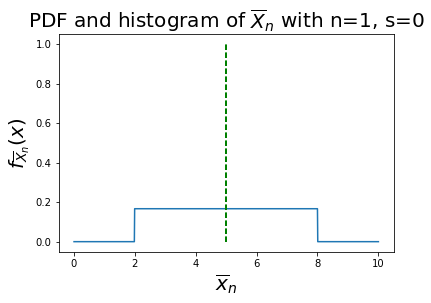

In [7]:
w=widgets.FloatRangeSlider(description = "[a, b]", value=[2, 8], min=0.02,max=9.98,step=0.01,continuous_update = False)
widgets.interact(uniform_mean_pdf,s=w,n=widgets.IntSlider(min=1, max=20,description='n:', step=1, value=1),h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

To see that this distribution is "real" here is a simulation obtained by adding $n$ samples from the uniform distributionLet's superimpose the pdf with a histogram 

### Exponential distribution

Again we plot the probability distribution function (PDF) of sample mean
$$\overline{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.$$
However, now the $X_i$ follow an i.i.d. exponential distribution with parameter $\lambda$
$$f_{X_i}(x)=\begin{cases}
\lambda e^{-\lambda x} & x\ge 0\\
0 & x<0
\end{cases}$$
The green line denotes $x=E[X_i]$.

In [6]:
from math import exp,factorial
# Generate the sample mean of k exponential distribution with parameter beta, repeat that n times
def generate_exponential_counts(lam,k,n):
    X= random.exponential(1.0/lam,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/k
    return S

def exp_plot_hist(lam,k,h):
    n=h
    if h>0:
        counts=generate_exponential_counts(lam,k,n)
        hist(counts,bins=30,normed=1);

# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~Exp_{lam}
from math import exp
def exponential_mean_pdf(lam,n,h):
    d = 5.0/1000;
    x=linspace(0.01,5,1000)
    z=[(lam**n)*((i*(n))**(n-1))*exp(-lam*(i*(n)))/(factorial(n-1))*(n) for i in x]
    close()
    plot(x, z)
    plot([1.0/lam, 1.0/lam], [0, 2], 'g--', linewidth = 2.0)
    exp_plot_hist(lam,n,h)
    title('PDF and histogram of $\overline{X}_n$ with n=%d, s=%d'%(n,h), fontsize = 20)
    xlabel('$x$', fontsize = 20)
    ylabel('$f_{\overline{X}_n}(x)$', fontsize = 20)

Next some sliders to control the input, followed by the actual simulation. 

$\lambda$ is the parameter of the exponential distirbution, shown in blue, and its mean $x=1/\lambda=E[X_i]$
is shown in green. $n$ is the number of variables that get averaged and the pdf of the average is shown in blue. For example, if $n=5$ and $s=1000$ then you generate 1000 samples, where each sample is the mean of 5 samples from the exponential distribution. 

Observe that as you increase $n$, the distribution of the mean approaches a spike at $\mu$. And when you increase $s$ the simulation histogram approaches the actual distribution. 


<function __main__.exponential_mean_pdf>

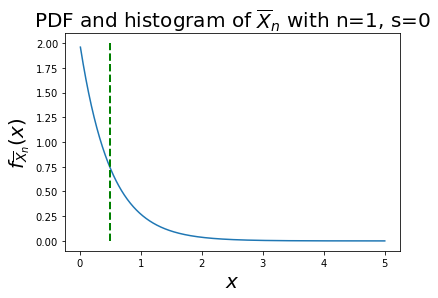

In [7]:
widgets.interact(
    exponential_mean_pdf,
    lam=widgets.FloatSlider(min=1, max=4,description='$\lambda$:', step=0.1, value=2),
    n=widgets.IntSlider(min=1, max=20,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

## Central Limit Theorem
### Uniform Distribution

This section demonstrates the Central Limit Theorem by comparing
$$S_n=\frac{1}{\sqrt{n}}\sum_{i=1}^n \left({X_i-\mu}\right)$$
with the normal distribution $\mathcal{N}(0,\sigma^2)$
where $X_i$ are iid random variables and $\mu=E[X_i]$, $\sigma^2=V(X_i)$.

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when $X_i$ follows uniform distribution on $[a,b]$. Observe how quickly the distribution of $S_n$ converges to normal. 

In [8]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
from math import sqrt,exp
def uniform_sample_counts(a,b,k,n):
    X= random.uniform(a-(a+b)/2,b-(a+b)/2,[k,n])  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(k)
    return S

def uniform_plot_hist(s,k,h):
    a=s[0]
    b=s[1]
    if h>0:
        n=h
        counts=uniform_sample_counts(a,b,k,n)
        hist(counts,bins=40,normed=1);
    
def uniform_mean_pdf(s,n,h):
    a = s[0]
    b = s[1]
    d = 10.0/1000;
    x=linspace(-4.99,5,1000)
    if a<b:
        y=(1.0*(x>=(a-b)/2))*(1.0*(x<=(b-a)/2))/(b-a)
        z=y
        for j in range(2,n+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z=[0,] + convolve(y,t).tolist()
            z=[i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        sc = int(n/sqrt(n))
        rem = n/sqrt(n)-sc
        z = [item/(rem+sc) for item in z for i in range(sc+random.binomial(1,rem))]
        x = linspace(-d*len(z)/2,d*len(z)/2,len(z))
        close()
        plot(x, z)
        xlim([-5,5])
        title('PDF and histogram of ${Z}_n$ with n=%d'%n, fontsize = 20)
        xlabel('$x$', fontsize = 20)
        ylabel('$f_{S_n}(x)$', fontsize = 20)
        
        var = (b-a)**2/12
        p = linspace(-5,5,1000)
        q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
        plot(p,q)
        xlim([-5,5])
        grid()
        
        uniform_plot_hist(s,n,h)

<function __main__.uniform_mean_pdf>

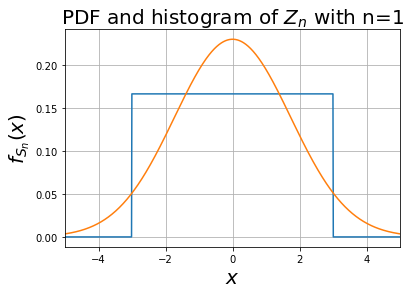

In [9]:
w=widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[2, 8],
    min=0.02,
    max=9.98,
    step=0.01,
    continuous_update = False)
widgets.interact(
    uniform_mean_pdf,
    s=w,
    n=widgets.IntSlider(min=1, max=10,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when the $X_i$ follow exponential distribution with parameter $\lambda$. Again observe the high convergence speed.

<function __main__.exponential_mean_pdf>

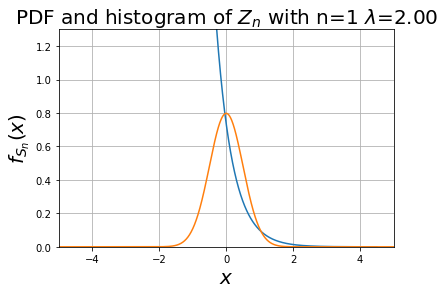

In [10]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~Exp_{lam}
from math import exp,factorial,sqrt
def exp_sample_counts(lam,k,n):
    X= random.exponential(1.0/lam,[k,n])-1.0/lam  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(k)
    return S

def exp_plot_hist(lam,k,h):
    lam
    if h>0:
        n=h
        counts=exp_sample_counts(lam,k,n)
        hist(counts,bins=40,normed=1);
    
def exponential_mean_pdf(lam,n,h):
    d=0.01
    x=linspace(d,5,500)
    z=[(lam**n)*((i*sqrt(n))**(n-1))*exp(-lam*(i*sqrt(n)))/(factorial(n-1))*sqrt(n) for i in x]
    x=linspace(d-n/(sqrt(n)*lam),5-n/(sqrt(n)*lam),500)
    close()
    plot(x, z)
    #plot([1.0/lam, 1.0/lam], [0, 2], 'g--', linewidth = 2.0)
    title('PDF and histogram of ${Z}_n$ with n=%d $\lambda$=%1.2f'%(n,lam), fontsize = 20)
    xlabel('$x$', fontsize = 20)
    ylabel('$f_{S_n}(x)$', fontsize = 20)
    
    var = 1.0/(lam**2)
    p = linspace(-5,5,1000)
    q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
    plot(p,q)
    xlim([-5,5])
    ylim([0,1.3])
    grid()
    
    exp_plot_hist(lam,n,h)

widgets.interact(
    exponential_mean_pdf,
    lam=widgets.FloatSlider(min=1, max=3,description='$\lambda$:', step=0.1, value=2),
    n=widgets.IntSlider(min=1, max=30,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))